In [1]:
import pandas as pd
import numpy as np

In [2]:
#df=pd.read_csv("C:/Users/DELL/Downloads/archive/spam.csv")
file_path = "spam.csv"
df = pd.read_csv(file_path, encoding='latin1')  # Try 'latin1' or 'iso-8859-1'
print("File read successfully.")

File read successfully.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4141,ham,Infact happy new year. How are you where are y...,NaN,NaN,NaN
5453,ham,Except theres a chick with huge boobs.,NaN,NaN,NaN
543,ham,4 oclock at mine. Just to bash out a flat plan.,NaN,NaN,NaN
695,ham,Good. Good job. I like entrepreneurs,NaN,NaN,NaN
1742,ham,\EY! CALM DOWNON THEACUSATIONS.. ITXT U COS IW...,NaN,NaN,NaN


In [4]:
#Removing the unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Renaming columns
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
4653,ham,Hope you are having a great day.
3503,ham,Will you be here for food
2105,ham,I fetch yun or u fetch?
4857,ham,Ok...
840,ham,I luv u soo much u donåÕt understand how speci...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [8]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep='first')

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.duplicated().sum()

403

In [14]:
#EDA

In [15]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

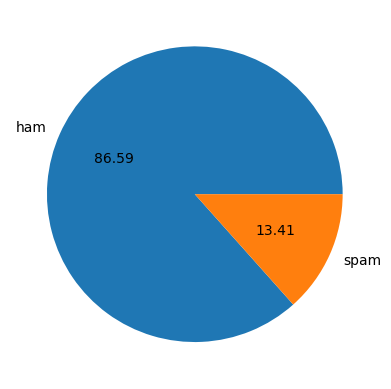

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [17]:
#Data is imbalanced

In [18]:
df['target'] = df['target'].replace({'spam': 1, 'ham': 0})

C:\Users\shaur\AppData\Local\Temp\ipykernel_9736\3292731649.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'spam': 1, 'ham': 0})


In [19]:
import nltk

In [20]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
#No. of characters
df['no_of_characters']=df['text'].apply(len)

In [22]:
from nltk.tokenize import word_tokenize

In [23]:
#No. of words
df['no_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
#No. of sentences
df['no_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df[['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==1][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [27]:
df[df['target']==0][['no_of_characters','no_of_words','no_of_sentences']].describe()

,no_of_characters,no_of_words,no_of_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df.sample(10)

,target,text,no_of_characters,no_of_words,no_of_sentences
4438,0,i want to grasp your pretty booty :),36,9,1
601,0,If u sending her home first it's ok lor. I'm n...,59,17,2
866,0,"Same here, but I consider walls and bunkers an...",159,32,1
5038,0,Pls clarify back if an open return ticket that...,98,22,1
5322,0,"Thanks, I'll keep that in mind",30,8,1
5531,0,Compliments to you. Was away from the system. ...,60,14,3
3621,0,Goin to workout lor... Muz lose e fats...,42,10,1
2159,1,FREE for 1st week! No1 Nokia tone 4 ur mob eve...,147,31,3
2188,1,FREE camera phones with linerental from 4.49/m...,152,26,3
1135,0,K do I need a login or anything,31,8,1


In [29]:
import seaborn as sb

<Axes: ylabel='Count'>

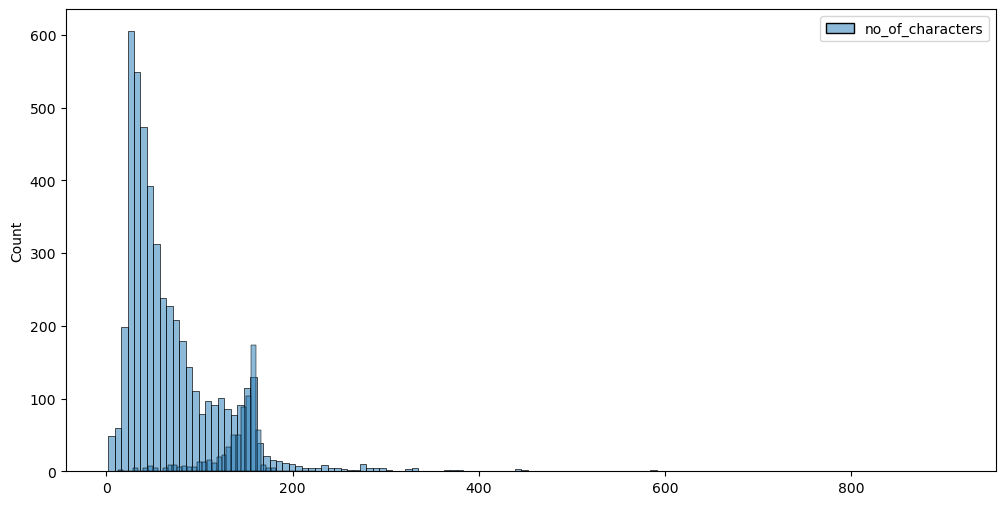

In [30]:
plt.figure(figsize=(12,6))
sb.histplot(df[df['target']==0][['no_of_characters']])
sb.histplot(df[df['target']==1][['no_of_characters']], color='red')

<Axes: ylabel='Count'>

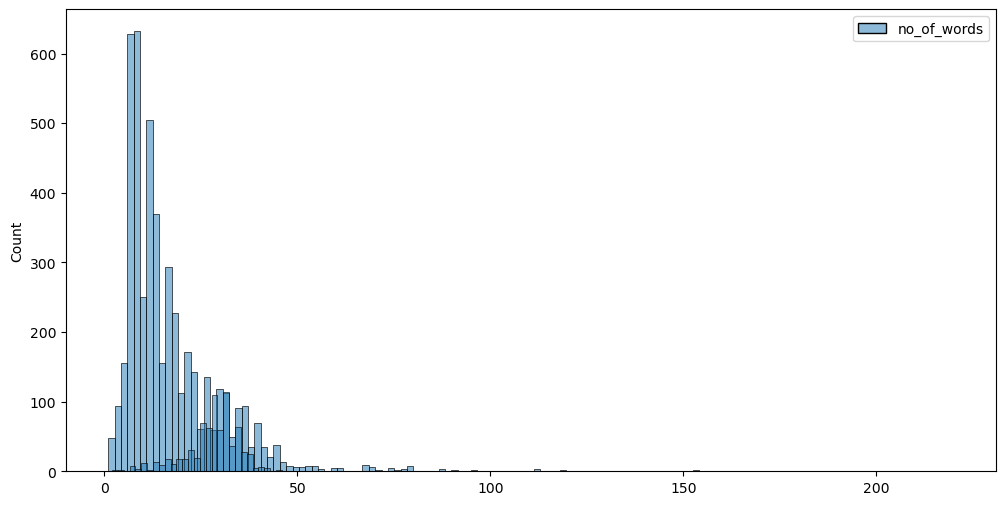

In [31]:
plt.figure(figsize=(12,6))
sb.histplot(df[df['target']==0][['no_of_words']])
sb.histplot(df[df['target']==1][['no_of_words']], color='red')

In [32]:
#Data Preprocessing
#lower case, tokenization, removing special characters, removing stop words and punctuations, stemming

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()
ps.stem('loving')

'love'

In [36]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    text_=[]
    for i in text:
        if i.isalnum():
            text_.append(i)
    text=text_[:]
    text_.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            text_.append(i)
    text=text_[:]
    text_.clear()

    for i in text:
        text_.append(ps.stem(i))
        
    return " ".join(text_)
  

In [38]:
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')

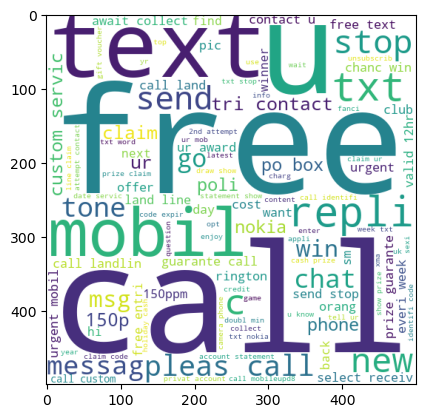

In [40]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

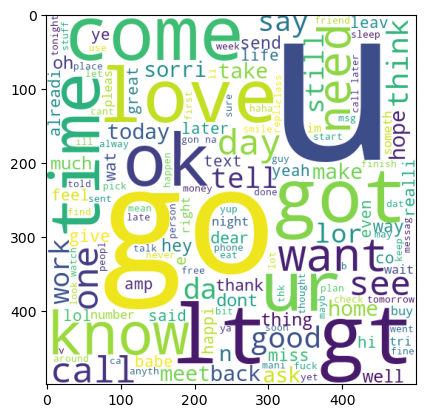

In [41]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [42]:
spam_words=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_words.append(word)

In [43]:
len(spam_words)

11490

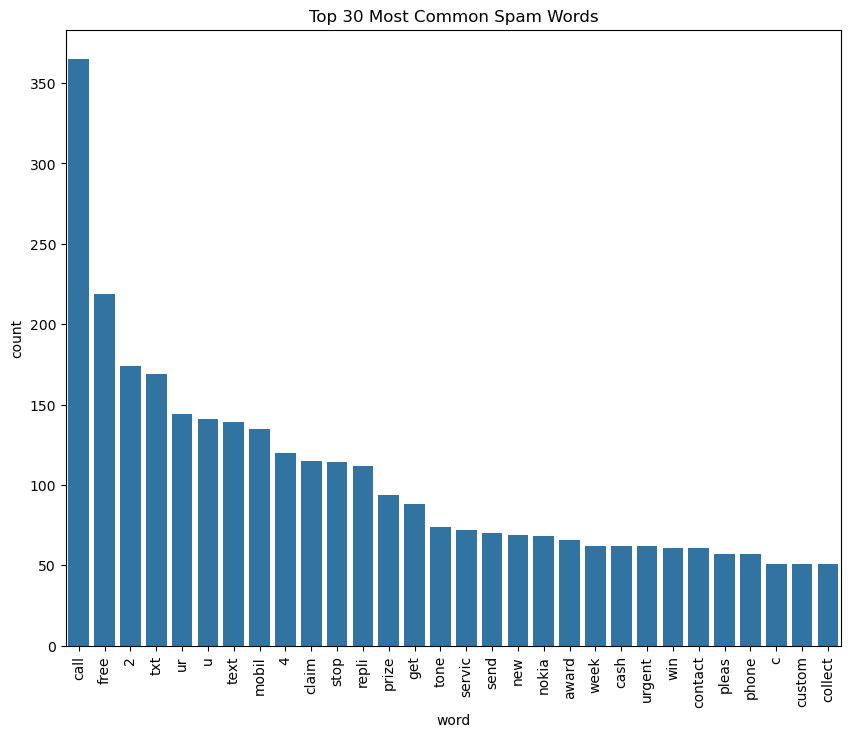

In [44]:
from collections import Counter
#Count the occurrences of each word
spam_word_counts = Counter(spam_words).most_common(30)

# Convert the counts to a DataFrame
spam_word_df = pd.DataFrame(spam_word_counts, columns=['word', 'count'])

# Plot the data using seaborn
plt.figure(figsize=(10, 8))
sb.barplot(x='word', y='count', data=spam_word_df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title('Top 30 Most Common Spam Words')
plt.show()

In [45]:
ham_words=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_words.append(word)

In [46]:
len(ham_words)

38221

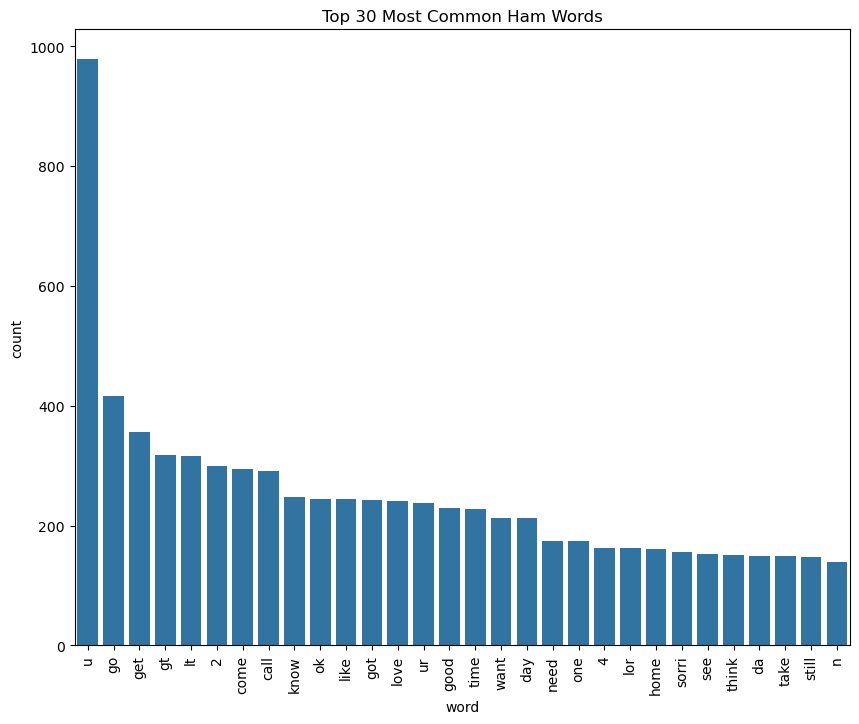

In [47]:
from collections import Counter
#Count the occurrences of each word
ham_word_counts = Counter(ham_words).most_common(30)

# Convert the counts to a DataFrame
ham_word_df = pd.DataFrame(ham_word_counts, columns=['word', 'count'])

# Plot the data using seaborn
plt.figure(figsize=(10, 8))
sb.barplot(x='word', y='count', data=ham_word_df)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.title('Top 30 Most Common Ham Words')
plt.show()

In [48]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [49]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [50]:
x.shape

(5572, 3000)

In [51]:
y=df['target'].values

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [55]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[841 116]
 [ 32 126]]
0.5206611570247934


In [56]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748878923766816
[[955   2]
 [ 26 132]]
0.9850746268656716


In [57]:
mnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827
